# House Price California - Data Analysis

In [1]:
## Bibliotecas

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_california_housing
import missingno as msn
import seaborn as sns

## Get Data

Os dados são coletados diretamento da biblioteca do Sklearn, e assim convertidos para dataframe. 

In [2]:
housing = fetch_california_housing()
data_housing = pd.DataFrame(data=housing.data, columns=housing.feature_names)
data_housing_target = pd.DataFrame(data=housing.target, columns=housing.target_names)
data_housing.head()
data_housing_target.head()


,MedHouseVal
0,4.526
1,3.585
2,3.521
3,3.413
4,3.422


### Visualização Geral

Aqui são apresentadas as células vazias, parâmetros e etc. 

In [26]:
print("Features \n")
print("Colunas:", len(data_housing.columns))
print("Linhas:", len(data_housing))
print(data_housing.dtypes)

print("Target \n")
print("Colunas:", len(data_housing_target.columns))
print("Linhas:", len(data_housing_target))
data_housing_target.dtypes




Features 

Colunas: 8
Linhas: 20640
MedInc        float64
HouseAge      float64
AveRooms      float64
AveBedrms     float64
Population    float64
AveOccup      float64
Latitude      float64
Longitude     float64
dtype: object
Target 

Colunas: 1
Linhas: 20640


MedHouseVal    float64
dtype: object

Não existem células vazias na base de dados. 

<AxesSubplot:>

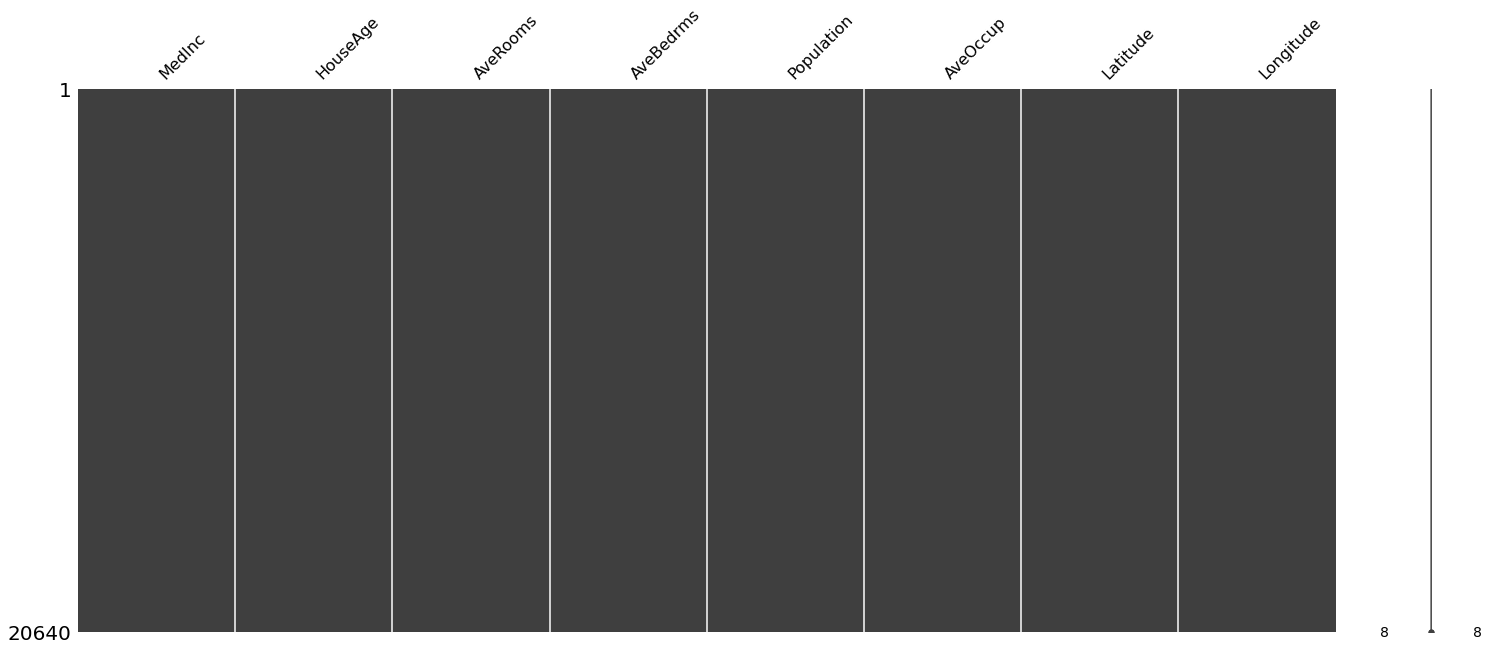

In [20]:
msn.matrix(data_housing)

## Data Visualization

Como é possível ver pelo resultado, os barrios tem uma renda média de R$ 387000 por ano, com um desvio de R$190000. A idade é o conjunto de dados mais disperso, tanto que a variância resultou em 158. 

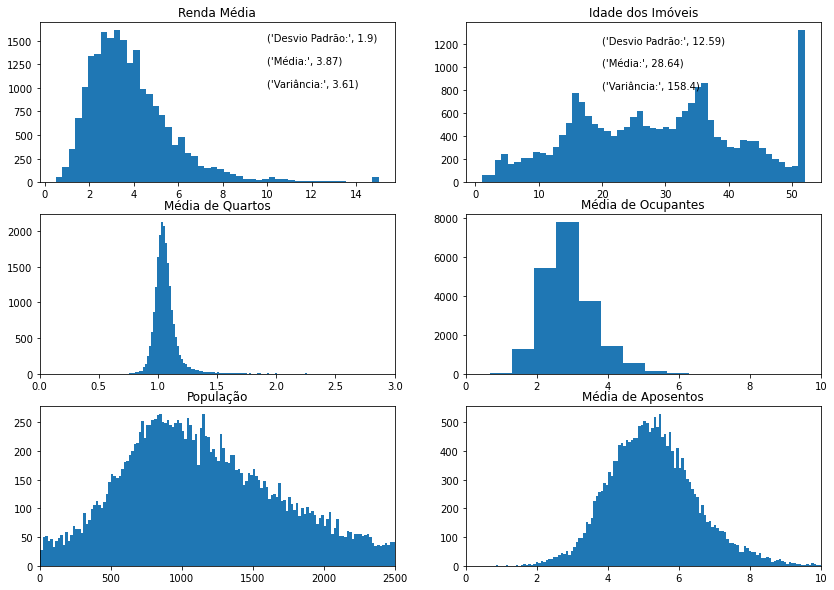

In [50]:
figure, axis = plt.subplots(3, 2)
sd_median_income = "Desvio Padrão:", round(data_housing.MedInc.std(), 2)
mean_median_income = "Média:", round(data_housing.MedInc.mean(),2)
var_median_income =  "Variância:", round(data_housing.MedInc.var(),2)


axis[0, 0].hist(data_housing.MedInc, bins =50)
axis[0, 0].set_title("Renda Média")
axis[0, 0].annotate(sd_median_income,textcoords='data', xy = (10,1500), horizontalalignment='left')
axis[0, 0].annotate(mean_median_income,textcoords='data', xy = (10,1250), horizontalalignment='left')
axis[0, 0].annotate(var_median_income,textcoords='data', xy = (10,1000), horizontalalignment='left')


sd_age = "Desvio Padrão:", round(data_housing.HouseAge.std(), 2)
mean_age = "Média:", round(data_housing.HouseAge.mean(),2)
var_age =  "Variância:", round(data_housing.HouseAge.var(),2)

axis[0, 1].hist(data_housing.HouseAge, bins = 50)
axis[0, 1].set_title("Idade dos Imóveis")
axis[0, 1].annotate(sd_age,textcoords='data', xy = (20,1200), horizontalalignment='left')
axis[0, 1].annotate(mean_age,textcoords='data', xy = (20,1000), horizontalalignment='left')
axis[0, 1].annotate(var_age,textcoords='data', xy = (20,800), horizontalalignment='left')


axis[1, 0].hist(data_housing.AveBedrms, bins = 2000)
axis[1, 0].set_title("Média de Quartos")
axis[1, 0].set_xlim([0,3])


axis[1, 1].hist(data_housing.AveOccup, bins = 2000)
axis[1, 1].set_title("Média de Ocupantes")
axis[1, 1].set_xlim([0,10])

axis[2, 0].hist(data_housing.Population, bins =2000)
axis[2, 0].set_title("População")
axis[2, 0].set_xlim([0,2500])

axis[2, 1].hist(data_housing.AveRooms, bins =2000)
axis[2, 1].set_title("Média de Aposentos")
axis[2, 1].set_xlim([0,10])

plt.gcf().set_size_inches(14, 10)
plt.show()

Como é possível observar pelo gráfico dos valores médios dos imóveis, existe uma grande quantidade de valores acima de  R$500000. Isso pode ser um problema para o treinamento dos modelos. Dessa forma, serão realizados comparativos com e sem essa parte. 

<function matplotlib.pyplot.show(close=None, block=None)>

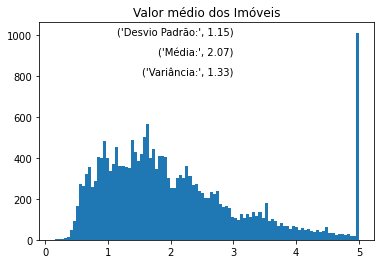

In [8]:
sd_value = "Desvio Padrão:", round(data_housing_target.MedHouseVal.std(), 2)
mean_value = "Média:", round(data_housing_target.MedHouseVal.mean(),2)
var_value =  "Variância:", round(data_housing_target.MedHouseVal.var(),2)

figure, ax = plt.subplots()
ax.hist(data_housing_target.MedHouseVal, bins = 100)
ax.set_title("Valor médio dos Imóveis")
ax.annotate(sd_value,textcoords='data', xy = (3,1000), horizontalalignment='right')
ax.annotate(mean_value,textcoords='data', xy = (3,900), horizontalalignment='right')
ax.annotate(var_value,textcoords='data', xy = (3,800), horizontalalignment='right')


plt.show




### Análise Preços
Como é possível analisar pelo gráfico abaixo, os bairros mais próximos do Litoral são mais caros, enquanto que os mais afastados são mais baratos. 

> Os Plots com cores precisam usar o parâmetro "c" do plot junto com o cmap. O C indica qual variável será usada para colorir, e o cmap o padrão de cores.

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


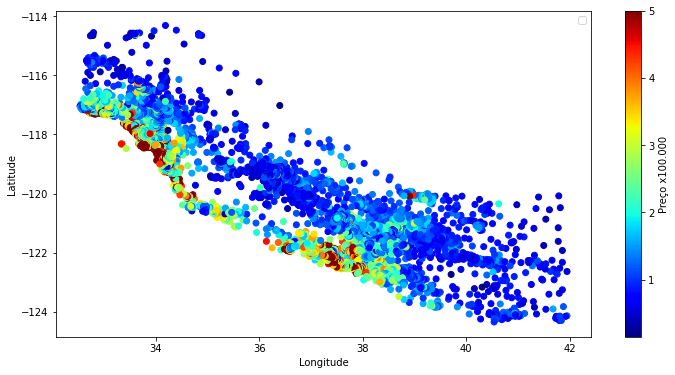

In [28]:
figure, ax = plt.subplots()

sc = ax.scatter(data_housing.Latitude, data_housing.Longitude, c = data_housing_target.MedHouseVal, cmap=plt.get_cmap("jet"))
cbar = plt.colorbar(sc)
figure.set_size_inches(12,6)
ax.set_xlabel("Longitude")
ax.set_ylabel("Latitude")
cbar.set_label("Preço x100.000")
plt.legend()
plt.show()

## Correlation Analysis

Análise:
- Correlação mais alta entre entre as features e o preço dos imóveis (Target) é 0,69, entre o preço médio e a renda média da população. O que faz sentido, pois quanto maior a renda, maior o poder de compra para imóveis mais caros. 
- A correlação mais alta é de 0.85, entre a média de quartos e a média de aposentos. 
- Correlação entre latitude e longitude não precisa ser analisada. 


Para análise de correlação, os dois dataframes separados (target e features) serão concatenados. 

### Heatmap

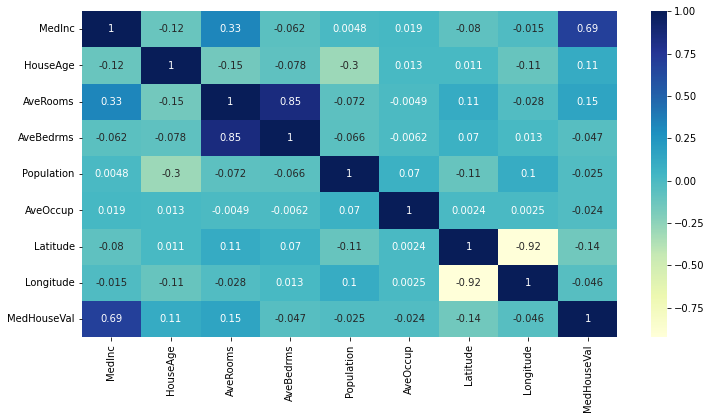

In [7]:
housing_full = pd.concat([data_housing, data_housing_target], axis=1)

#print(housing_full.corr())
figure, ax = plt.subplots()
heatmap = sns.heatmap(housing_full.corr(), cmap="YlGnBu", annot=True)
figure.set_size_inches(12,6)
plt.show()

### Pairplot

Com os gráficos de dispersão é possível identificar algumas relações pouco relacionadas. Por exemplo, como os dados de idade são muito dispersos, a visualização mostra isso com poucos padrões. 

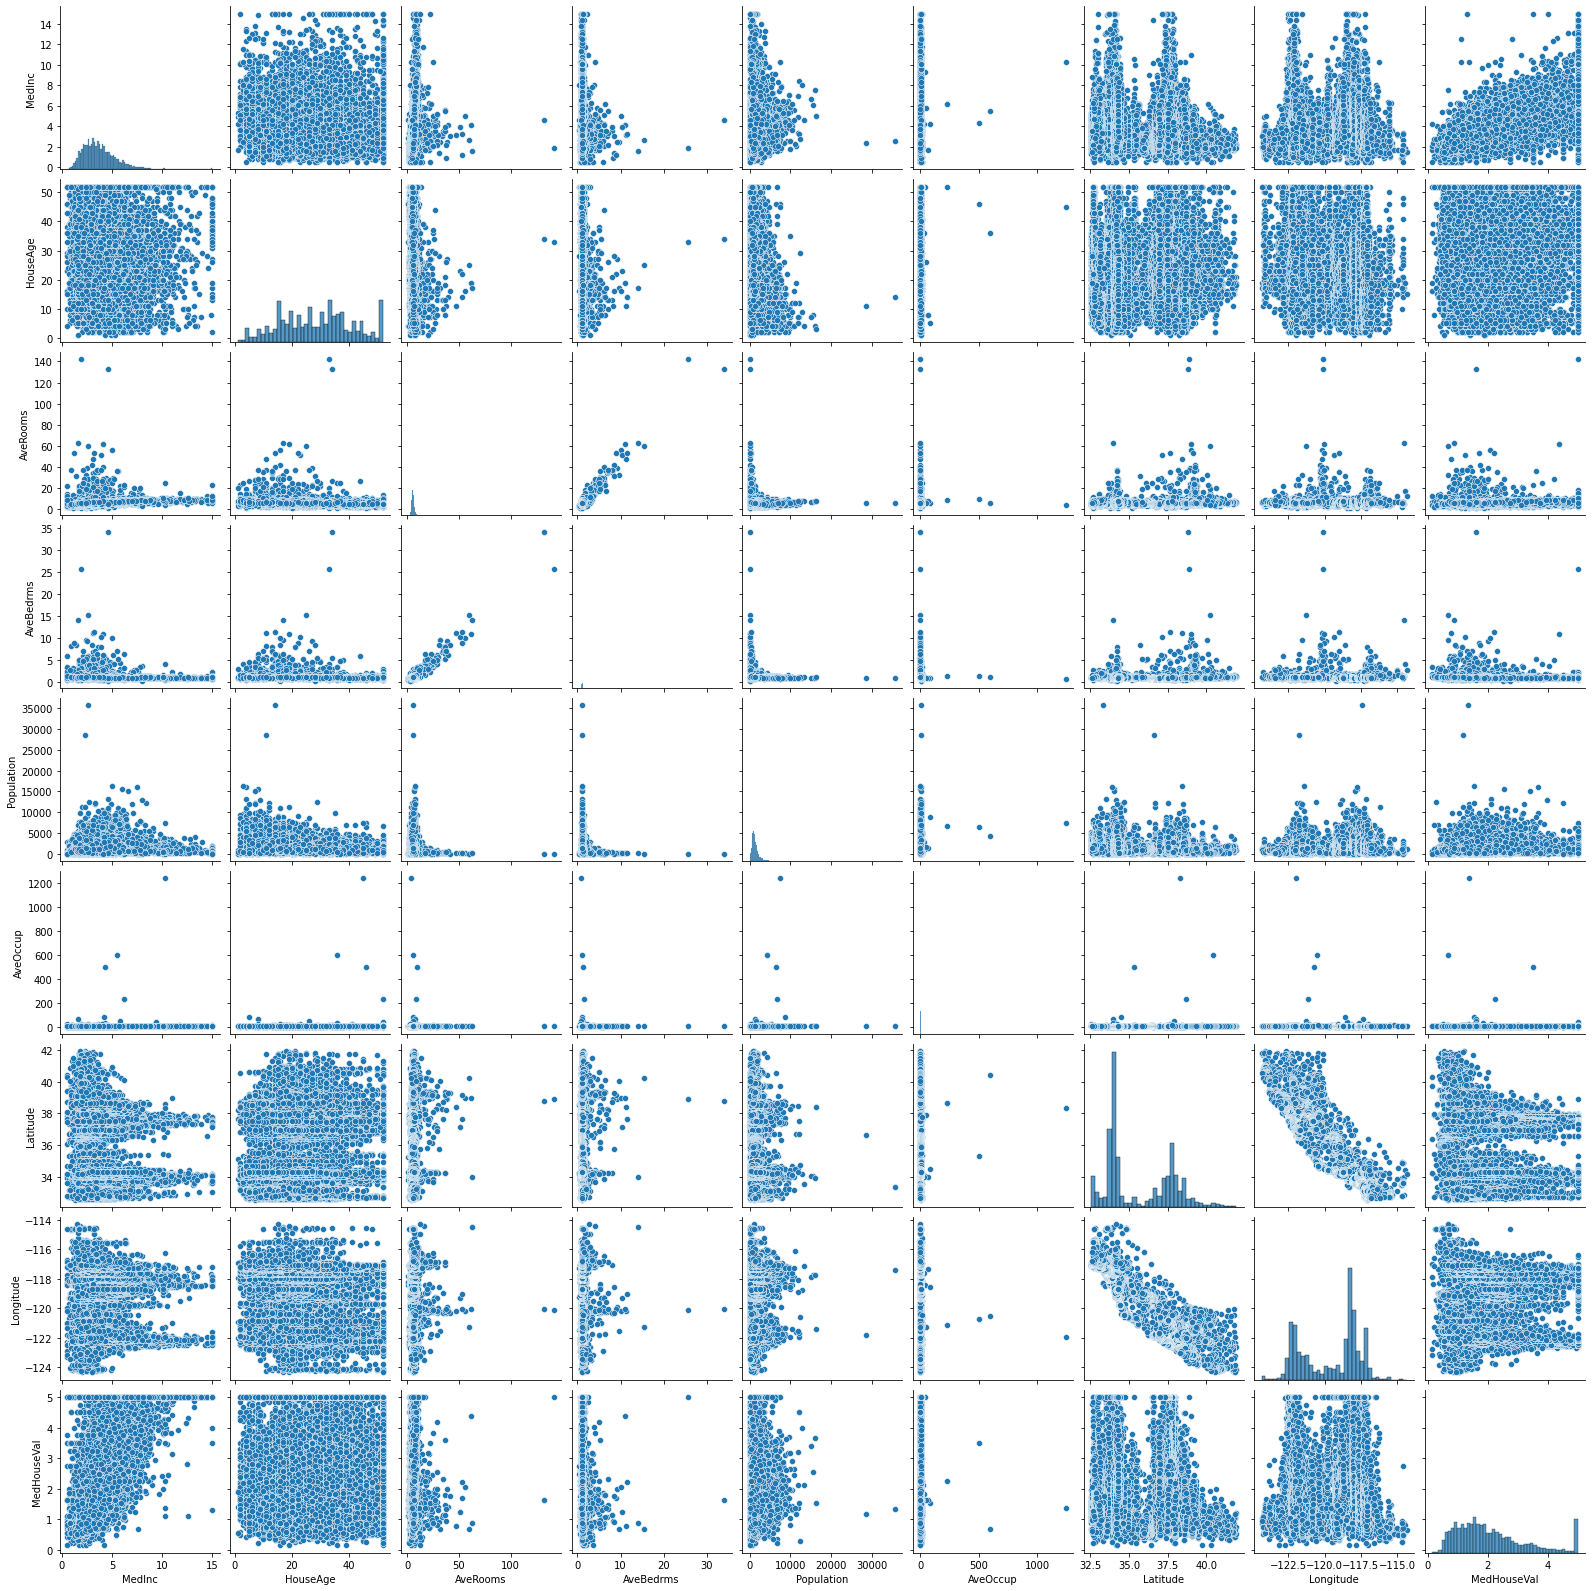

In [8]:
sns.pairplot(housing_full)

Em uma visualização mais próxima é possível identificar algumas situações:
- Note a relação dos dados de preço acima de 500.000 mencionadao no histograma. Muito provavelmente esses dados são outliers que prejudicarão o desempenho dos modelos. Assim é interessante investigar esse relação. 
- Outras relações são mais dispersas, com correlação baixa. Algumas delas indicam uma linha bastante inclinada. 

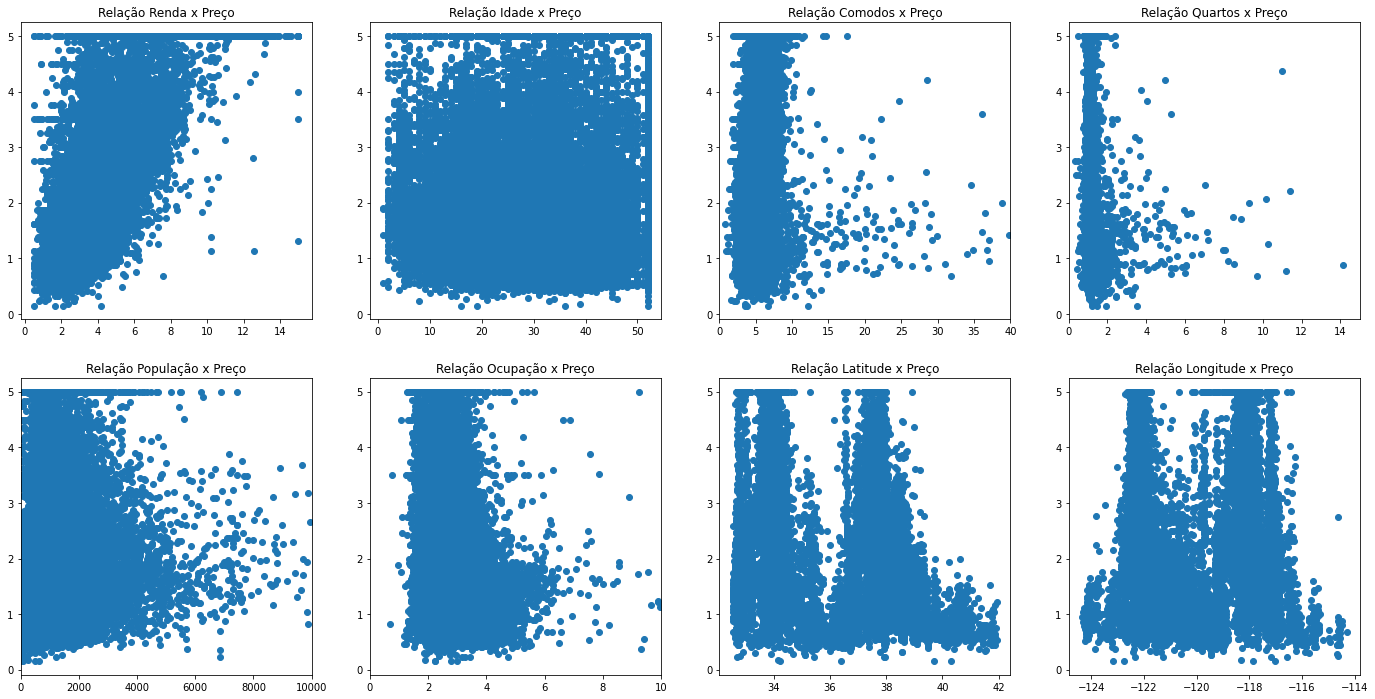

In [15]:
figure, axis = plt.subplots(2, 4)
axis[0, 0].scatter(x = housing_full.MedInc, y = housing_full.MedHouseVal)
axis[0, 0].set_title("Relação Renda x Preço")


axis[0, 1].scatter(x = housing_full.HouseAge, y = housing_full.MedHouseVal)
axis[0, 1].set_title("Relação Idade x Preço")

axis[0, 2].scatter(x = housing_full.AveRooms, y = housing_full.MedHouseVal)
axis[0, 2].set_title("Relação Comodos x Preço")
axis[0, 2].set_xlim([0,40])

axis[0, 3].scatter(x = housing_full.AveBedrms, y = housing_full.MedHouseVal)
axis[0, 3].set_title("Relação Quartos x Preço")
axis[0, 3].set_xlim([0,15])


axis[1, 0].scatter(x = housing_full.Population, y = housing_full.MedHouseVal)
axis[1, 0].set_title("Relação População x Preço")
axis[1, 0].set_xlim([0,10000])

axis[1, 1].scatter(x = housing_full.AveOccup, y = housing_full.MedHouseVal)
axis[1, 1].set_title("Relação Ocupação x Preço")
axis[1, 1].set_xlim([0,10])

axis[1, 2].scatter(x = housing_full.Latitude, y = housing_full.MedHouseVal)
axis[1, 2].set_title("Relação Latitude x Preço")

axis[1, 3].scatter(x = housing_full.Longitude, y = housing_full.MedHouseVal)
axis[1, 3].set_title("Relação Longitude x Preço")
figure.set_size_inches(24,12)
plt.show()


### Correlação com remoção Preço < $500.000

Aqui será analisada a correção removendo os dados com o preço acima de $500.000.

- A remoção desses dados não ocasionou o aumento da correção. 
- A influência desses dados será analisada melhor no treinamento dos modelos. 

In [26]:
housing_full = pd.concat([data_housing, data_housing_target], axis=1)

housing_full_reduce = housing_full.query("MedHouseVal < 5")


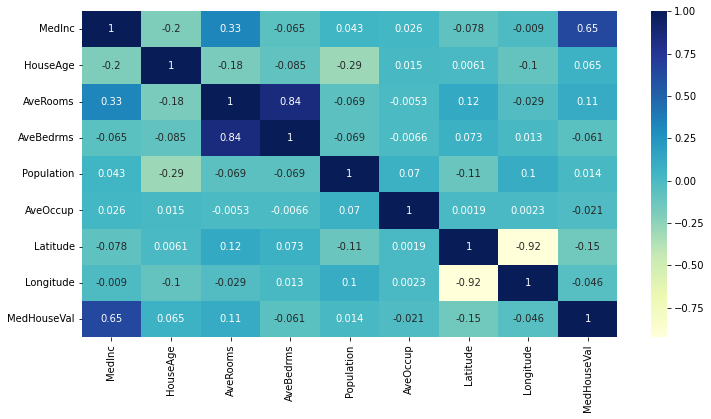

In [27]:
figure, ax = plt.subplots()
heatmap = sns.heatmap(housing_full_reduce.corr(), cmap="YlGnBu", annot=True)
figure.set_size_inches(12,6)
plt.show()

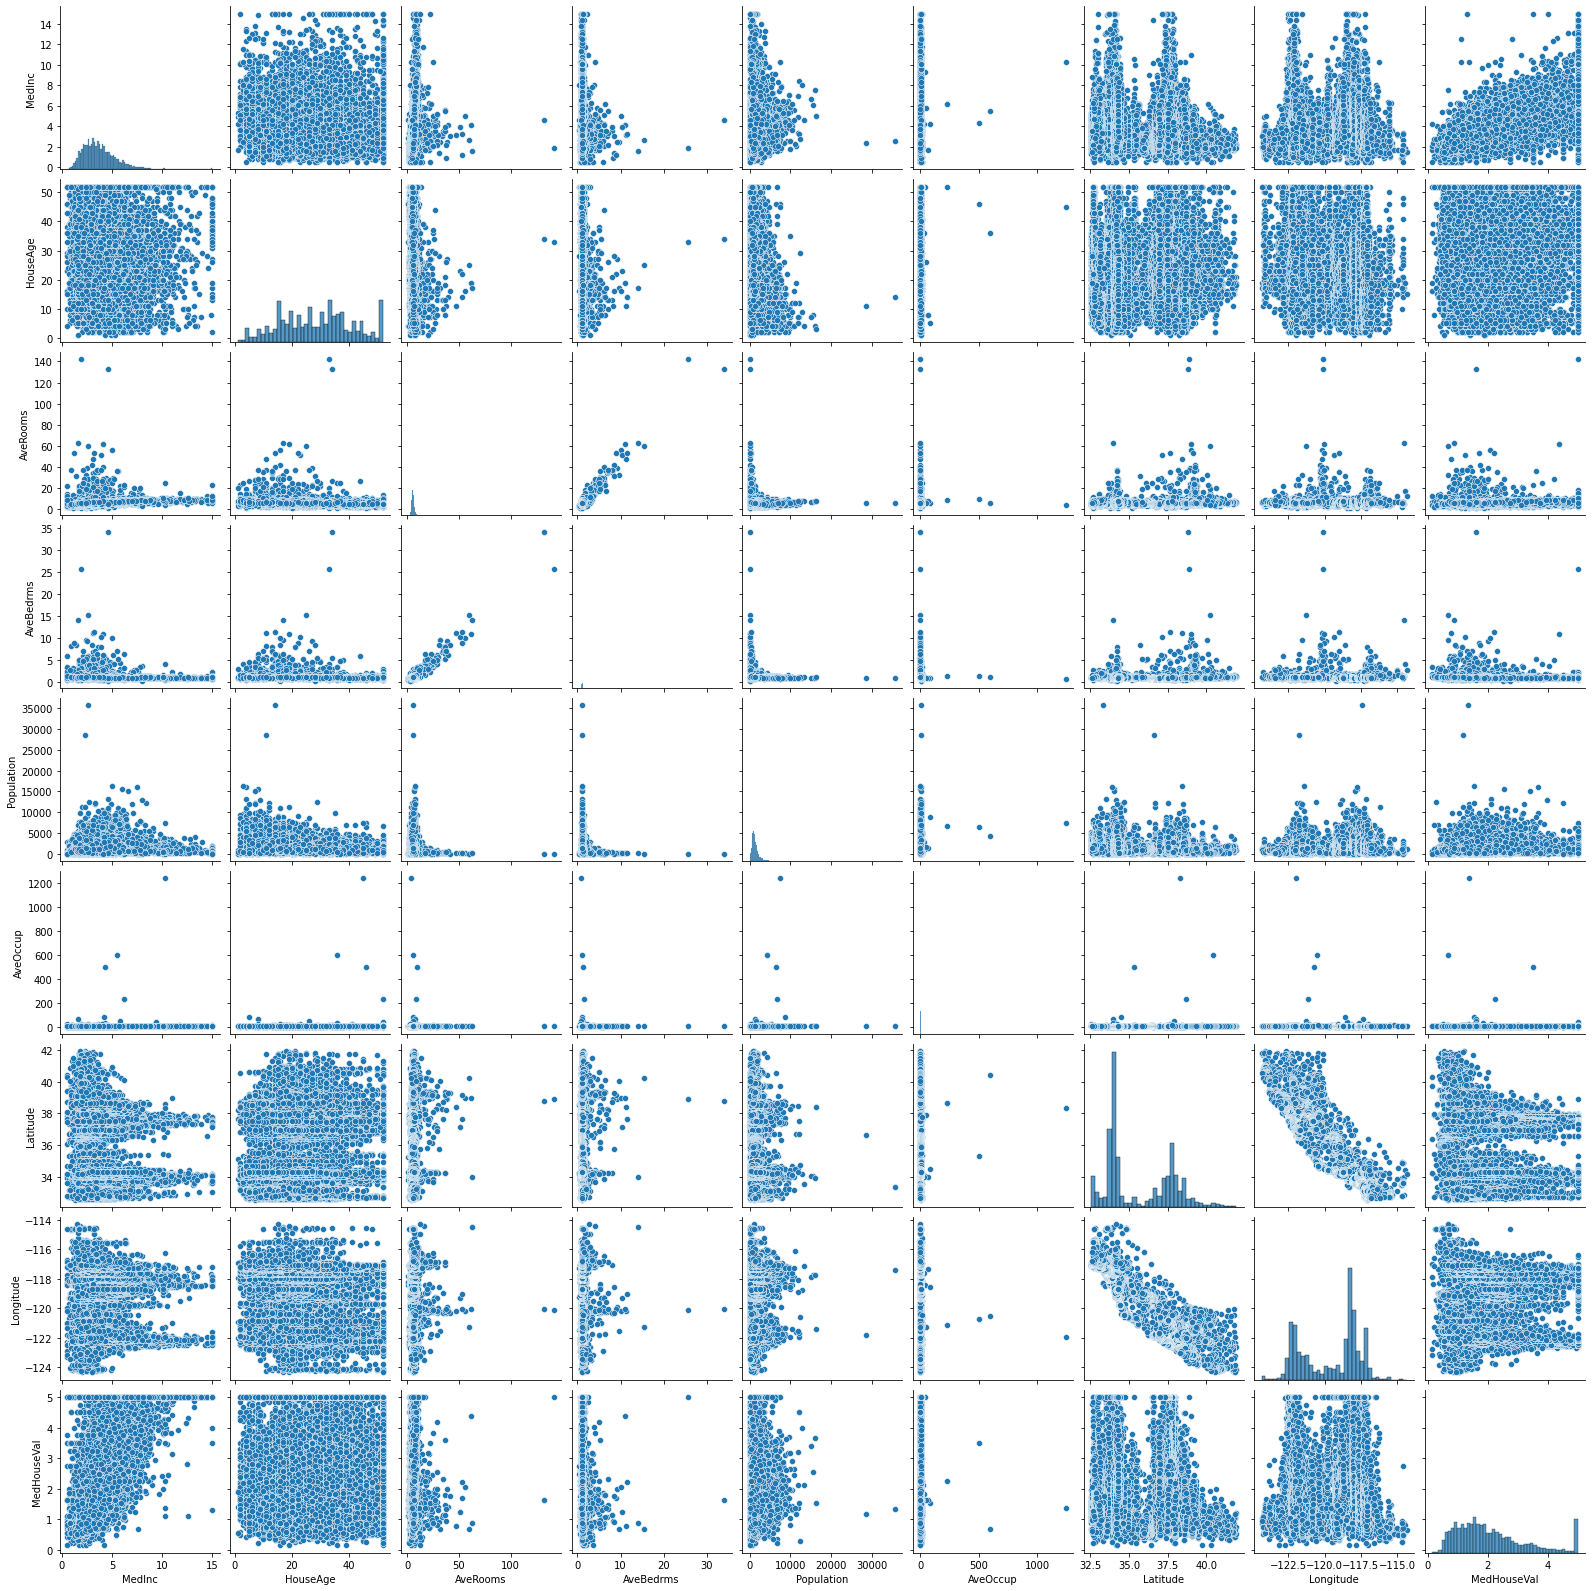

In [25]:
sns.pairplot(housing_full_reduce)